# Importation des bibliothèques

In [368]:
import sys
sys.path.insert(0, '..')

In [369]:
%load_ext autoreload
%autoreload 2
from modele import Module_lineare
from loss  import MSELoss
import utils as ut
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Régression Linéaire

### Génération des données

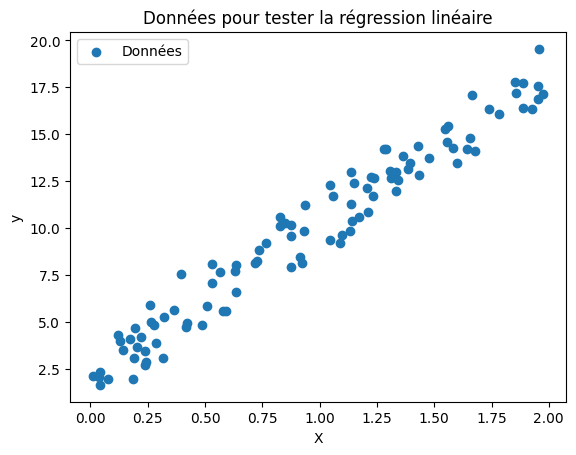

In [370]:
np.random.seed(0)

X = 2 * np.random.rand(100, 1)

a = 8
b = 2

noise = np.random.randn(100, 1)
y = a * X + b + noise

plt.scatter(X, y , label='Données')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Données pour tester la régression linéaire')
plt.legend()
plt.show()

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print("X ", X.shape)
print('Train :', X_train.shape)
print('Test :', X_test.shape)

X  (100, 1)
Train : (80, 1)
Test : (20, 1)


In [372]:
linear_module = Module_lineare(X.shape[1], 1 , True)
loss = MSELoss()
learning_rate = 1e-3

train_losses = []
test_losses = []
test_accuracies = []
best_params = None
loss_min = math.inf

nb_epochs = 200

for epoch in range(nb_epochs):
    linear_module.zero_grad()

    # Forward pass
    y_train_pred = linear_module.forward(X_train)
    loss_train = loss.forward(y_train, y_train_pred)
    train_losses.append(np.mean(loss_train))

    # Backward pass
    gradient_loss = loss.backward(y_train, y_train_pred)
    delta_linear = linear_module.backward_delta(X_train, gradient_loss)

    # Mise à jour des paramètres
    linear_module.backward_update_gradient(X_train, gradient_loss)
    linear_module.update_parameters(learning_rate)
    if np.mean(loss_train) < np.mean(loss_min) :
        best_params = linear_module.get_parameters()
        loss_min = loss_train
    # else :
    #     linear_module.set_parameters(best_params)

    # Test accuracy
    y_test_pred = linear_module.forward(X_test)
    loss_test = loss.forward(y_test, y_test_pred)
    test_losses.append(np.mean(loss_test))

    print(f"Epoch {epoch+1}, Loss: {np.mean(loss_train)}")

Epoch 1, Loss: 152.02872707238208
Epoch 2, Loss: 70.88444785068926
Epoch 3, Loss: 33.69130508090914
Epoch 4, Loss: 16.623755716725316
Epoch 5, Loss: 8.772988923721405
Epoch 6, Loss: 5.144213040357679
Epoch 7, Loss: 3.4504162598894523
Epoch 8, Loss: 2.6443681768435825
Epoch 9, Loss: 2.2464865405492347
Epoch 10, Loss: 2.0370962274573596
Epoch 11, Loss: 1.9155276424946581
Epoch 12, Loss: 1.8356036845503112
Epoch 13, Loss: 1.776101742673123
Epoch 14, Loss: 1.7272292592551337
Epoch 15, Loss: 1.6844312265550694
Epoch 16, Loss: 1.6455546718037943
Epoch 17, Loss: 1.609550175114693
Epoch 18, Loss: 1.5758771405592271
Epoch 19, Loss: 1.5442312970665413
Epoch 20, Loss: 1.514419745482514
Epoch 21, Loss: 1.486303571087206
Epoch 22, Loss: 1.4597714012884204
Epoch 23, Loss: 1.4347271410989628
Epoch 24, Loss: 1.4110842088141813
Epoch 25, Loss: 1.3887627561651894
Epoch 26, Loss: 1.3676882627854763
Epoch 27, Loss: 1.347790767328971
Epoch 28, Loss: 1.329004397082204
Epoch 29, Loss: 1.311267040852179
Epoch

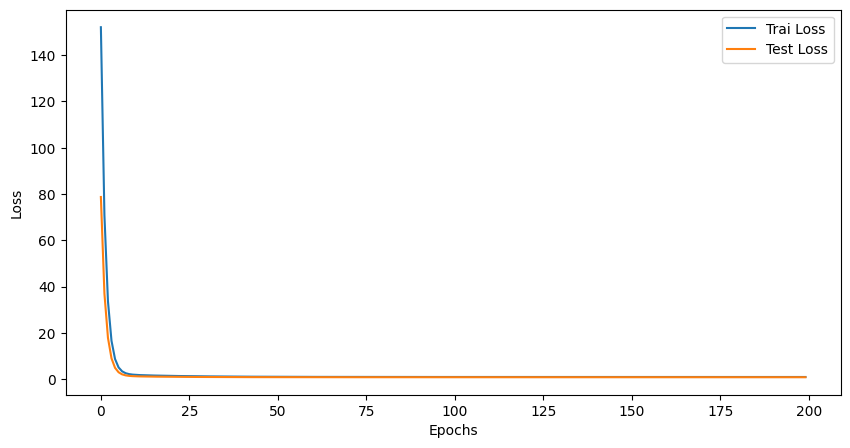

In [373]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Trai Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

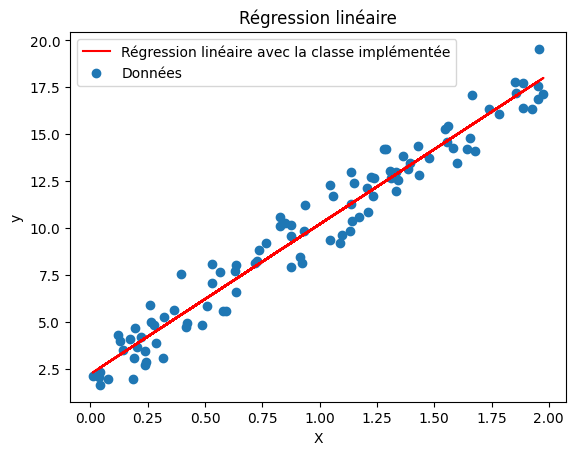

In [374]:


plt.plot(X_train, y_train_pred, 'r-', label='Régression linéaire avec la classe implémentée')
plt.scatter(X, y, label='Données')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Régression linéaire')
plt.legend()
plt.show()

### Avec Sklearn

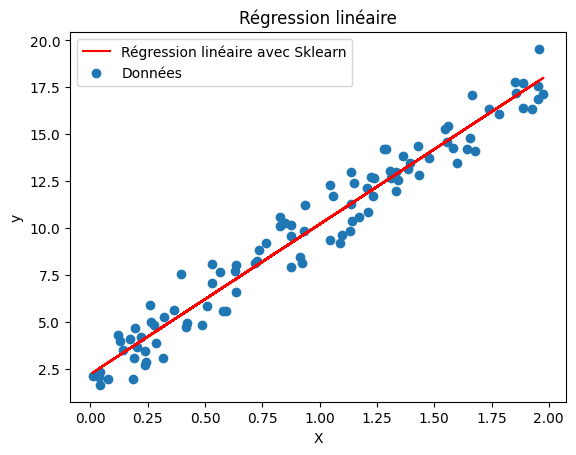

In [375]:
model = LinearRegression()
model.fit(X_train, y_train)
pred_sickit = model.predict(X_train)

plt.plot(X_train, pred_sickit, 'r-', label='Régression linéaire avec Sklearn')
plt.scatter(X, y, label='Données')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Régression linéaire')
plt.legend()
plt.show()

# 2. Classification

### Génération des données

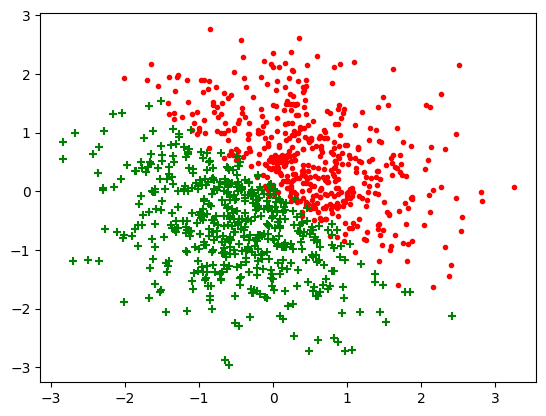

In [380]:
np.random.seed(0)
n_samples = 1000
n_features = 2
noise=0.1

X = np.random.randn(n_samples, n_features) 
w = np.random.randn(n_features)
b = np.random.randn(1) 
y = np.sign(np.dot(X, w) + b)  
y[y == -1] = 0 
y = y.reshape(-1, 1)  
X += noise * np.random.randn(n_samples, n_features)


ut.plot_data(X, y)

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print("X ", X.shape)
print('Train :', X_train.shape)
print('Test :', X_test.shape)



X  (1000, 2)
Train : (800, 2)
Test : (200, 2)


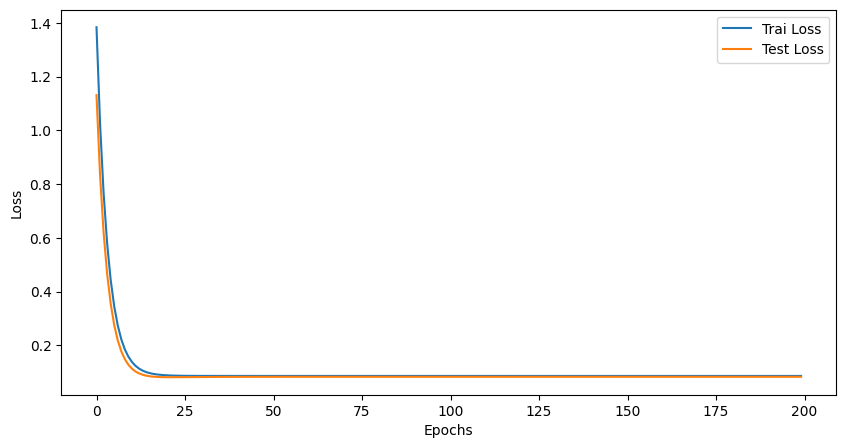

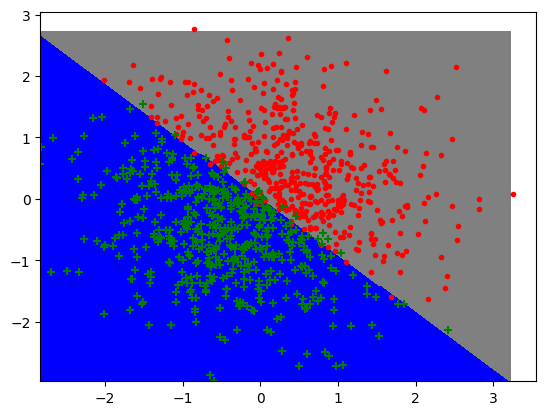

In [384]:
linear_module = Module_lineare(X.shape[1], 1 , True)
loss = MSELoss()
learning_rate = 1e-4

train_losses = []
test_losses = []
test_accuracies = []
best_params = None
loss_min = math.inf

nb_epochs = 200

for epoch in range(nb_epochs):
    linear_module.zero_grad()

    # Forward pass
    y_train_pred = linear_module.forward(X_train)
    loss_train = loss.forward(y_train, y_train_pred)
    train_losses.append(np.mean(loss_train))

    # Backward pass
    gradient_loss = loss.backward(y_train, y_train_pred)
    delta_linear = linear_module.backward_delta(X_train, gradient_loss)

    # Mise à jour des paramètres
    linear_module.backward_update_gradient(X_train, gradient_loss)
    linear_module.update_parameters(learning_rate)
    if np.mean(loss_train) < np.mean(loss_min) :
        best_params = linear_module.get_parameters()
        loss_min = loss_train

    # Test accuracy
    y_test_pred = linear_module.forward(X_test)
    loss_test = loss.forward(y_test, y_test_pred)
    test_losses.append(np.mean(loss_test))

    #print(f"Epoch {epoch+1}, Loss: {np.mean(loss_train)}")

def predict(x):
    return np.where(linear_module.forward(x) >= 0.5,1, 0)

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Trai Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
ut.plot_frontiere(X, predict, step=200)
ut.plot_data(X, y)
plt.show()

### Avec Sklearn

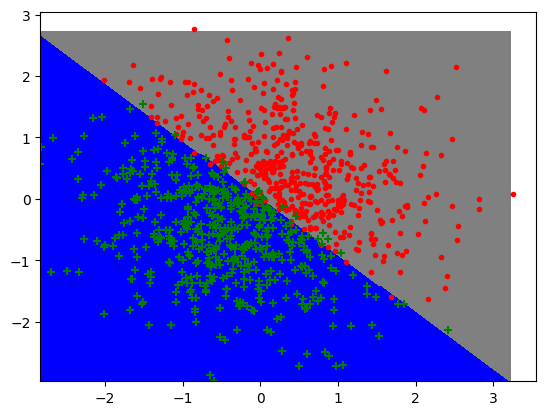

In [385]:
model = LinearRegression()
model.fit(X_train, y_train)
pred_sickit = model.predict(X_train)

def predict_2(x):
    return np.where(model.predict(x) >= 0.5,1, 0)

plt.figure()
ut.plot_frontiere(X, predict_2, step=200)
ut.plot_data(X, y)
plt.show()